2023-03-14 <br/>
European Drug Development <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-03-14/readme.md

Visualizations using Prompt Engineernig (ChatGPT-3) - Completed

https://github.com/AbdoulMa/TidyTuesday/blob/main/2023/2023_w11/tidytuesday_2023_w11.R

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df= pd.read_excel("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-14/Medicines_output_european_public_assessment_reports.xlsx",skiprows=8)
df.head()

,Category,Medicine name,Therapeutic area,International non-proprietary name (INN) / common name,Active substance,Product number,Patient safety,Authorisation status,ATC code,Additional monitoring,...,Vet pharmacotherapeutic group,Date of opinion,Decision date,Revision number,Condition / indication,Species,ATCvet code,First published,Revision date,URL
0,Human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,Brentuximab vedotin,EMEA/H/C/002455,no,Authorised,L01XC12,no,...,NaN,2012-07-19 00:00:00,2022-11-17 01:00:00,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,NaN,2018-07-25 13:58:00,2023-03-13 11:52:00,https://www.ema.europa.eu/en/medicines/human/E...
1,Human,Nityr,Tyrosinemias,nitisinone,nitisinone,EMEA/H/C/004582,no,Authorised,A16AX04,no,...,NaN,2018-05-31 00:00:00,2023-03-10 01:00:00,4.0,Treatment of adult and paediatric patients wit...,NaN,NaN,2018-07-26 14:20:00,2023-03-10 17:29:00,https://www.ema.europa.eu/en/medicines/human/E...
2,Human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,Tabelecleucel,EMEA/H/C/004577,no,Authorised,NaN,yes,...,NaN,2022-10-13 00:00:00,2023-03-09 01:00:00,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,NaN,2022-10-12 16:13:00,2023-03-10 13:40:00,https://www.ema.europa.eu/en/medicines/human/E...
3,Human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",EMEA/H/C/005814,no,Authorised,J06BD,yes,...,NaN,2021-11-11 01:00:00,2023-02-24 01:00:00,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,NaN,2021-11-12 16:30:00,2023-03-10 12:29:00,https://www.ema.europa.eu/en/medicines/human/E...
4,Human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,Secukinumab,EMEA/H/C/003729,no,Authorised,L04AC10,no,...,NaN,2014-11-20 01:00:00,2023-01-26 01:00:00,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,NaN,2018-06-07 11:59:00,2023-03-09 18:53:00,https://www.ema.europa.eu/en/medicines/human/E...


In [3]:
df.columns

Index(['Category', 'Medicine name', 'Therapeutic area',
       'International non-proprietary name (INN) / common name',
       'Active substance', 'Product number', 'Patient safety',
       'Authorisation status', 'ATC code', 'Additional monitoring', 'Generic',
       'Biosimilar', 'Conditional approval', 'Exceptional circumstances',
       'Accelerated assessment', 'Orphan medicine',
       'Marketing authorisation date',
       'Date of refusal of marketing authorisation',
       'Marketing authorisation holder/company name',
       'Human pharmacotherapeutic group', 'Vet pharmacotherapeutic group',
       'Date of opinion', 'Decision date', 'Revision number',
       'Condition / indication', 'Species', 'ATCvet code', 'First published',
       'Revision date', 'URL'],
      dtype='object')

In [4]:
from copy import deepcopy
df_medicine = deepcopy(df)

In [5]:
df_medicine.rename(columns={'Marketing authorisation holder/company name':"holder_company_name"},inplace=True)

In [6]:
df_medicine.columns

Index(['Category', 'Medicine name', 'Therapeutic area',
       'International non-proprietary name (INN) / common name',
       'Active substance', 'Product number', 'Patient safety',
       'Authorisation status', 'ATC code', 'Additional monitoring', 'Generic',
       'Biosimilar', 'Conditional approval', 'Exceptional circumstances',
       'Accelerated assessment', 'Orphan medicine',
       'Marketing authorisation date',
       'Date of refusal of marketing authorisation', 'holder_company_name',
       'Human pharmacotherapeutic group', 'Vet pharmacotherapeutic group',
       'Date of opinion', 'Decision date', 'Revision number',
       'Condition / indication', 'Species', 'ATCvet code', 'First published',
       'Revision date', 'URL'],
      dtype='object')

In [7]:
df_medicine.holder_company_name

0                        Takeda Pharma A/S
1       Cycle Pharmaceuticals (Europe) Ltd
2                  Pierre Fabre Medicament
3                 Roche Registration GmbH 
4               Novartis Europharm Limited
                       ...                
1983         Eli Lilly and Company Limited
1984            Sonus Pharmaceuticals Ltd.
1985               Roche Registration Ltd.
1986                  Pasteur Mà¨rieux MSD
1987                     Alimenterics B.V.
Name: holder_company_name, Length: 1988, dtype: object

In [8]:
# Get major pharmaceutical companies
import numpy as np
df_medicine["Company"] = np.where(df_medicine.holder_company_name.str.contains('Novartis', regex=False), 'Novartis',
np.where(df_medicine.holder_company_name.str.contains('Pfizer', regex=False), 'Pfizer',
np.where(df_medicine.holder_company_name.str.contains('Zoetis', regex=False), 'Zoetis',
np.where(df_medicine.holder_company_name.str.contains('Zeneca', regex=False), 'AstraZeneca AB',
np.where(df_medicine.holder_company_name.str.contains('Boehringer', regex=False), 'Boehringer Ingelheim', 
np.where(df_medicine.holder_company_name.str.contains('Merck', regex=False), 'Merck',
np.where(df_medicine.holder_company_name.str.contains('Teva', regex=False), 'Teva',
np.where(df_medicine.holder_company_name.str.contains('Intervet', regex=False), 'Intervet',
np.where(df_medicine.holder_company_name.str.contains('Janssen', regex=False), 'Janssen',
np.where(df_medicine.holder_company_name.str.contains('Bayer', regex=False), 'Bayer',
np.where(df_medicine.holder_company_name.str.contains('Sanofi', regex=False), 'Sanofi','Other' )))))))))))

In [9]:
df_medicine.Company.value_counts()

Other                   1386
Novartis                  95
Pfizer                    77
Teva                      69
Merck                     63
Boehringer Ingelheim      59
Zoetis                    48
Intervet                  45
Janssen                   43
AstraZeneca AB            38
Sanofi                    37
Bayer                     28
Name: Company, dtype: int64

In [10]:
df_medicine_cleaned = deepcopy(df_medicine[df_medicine.Company!="Other"].reset_index(drop=True))
df_medicine_cleaned.head()

,Category,Medicine name,Therapeutic area,International non-proprietary name (INN) / common name,Active substance,Product number,Patient safety,Authorisation status,ATC code,Additional monitoring,...,Date of opinion,Decision date,Revision number,Condition / indication,Species,ATCvet code,First published,Revision date,URL,Company
0,Human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,Secukinumab,EMEA/H/C/003729,no,Authorised,L04AC10,no,...,2014-11-20 01:00:00,2023-01-26 01:00:00,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,NaN,2018-06-07 11:59:00,2023-03-09 18:53:00,https://www.ema.europa.eu/en/medicines/human/E...,Novartis
1,Human,Arava,"Arthritis, Rheumatoid; Arthritis, Psoriatic",leflunomide,leflunomide,EMEA/H/C/000235,no,Authorised,L04AA13,no,...,1999-05-20 00:00:00,2022-03-25 01:00:00,40.0,Leflunomide is indicated for the treatment of ...,NaN,NaN,2018-04-09 02:00:00,2023-03-09 11:34:00,https://www.ema.europa.eu/en/medicines/human/E...,Sanofi
2,Human,Stivarga,Colorectal Neoplasms,regorafenib,regorafenib,EMEA/H/C/002573,no,Authorised,L01EX05,no,...,NaT,2023-03-07 01:00:00,20.0,Stivarga is indicated as monotherapy for the t...,NaN,NaN,2018-06-25 12:23:00,2023-03-08 18:21:00,https://www.ema.europa.eu/en/medicines/human/E...,Bayer
3,Human,Prevymis,Cytomegalovirus Infections,letermovir,Letermovir,EMEA/H/C/004536,no,Authorised,J05,no,...,2017-10-12 00:00:00,2023-03-07 01:00:00,14.0,Prevymis is indicated for prophylaxis of cytom...,NaN,NaN,2018-07-23 12:13:00,2023-03-08 14:19:00,https://www.ema.europa.eu/en/medicines/human/E...,Merck
4,Human,Paxlovid,COVID-19 virus infection,"nirmatrelvir, ritonavir","nirmatrelvir, ritonavir",EMEA/H/C/005973,no,Authorised,J05AE30,no,...,2022-01-27 01:00:00,2023-02-24 01:00:00,10.0,Paxlovid is indicated for the treatment of cor...,NaN,NaN,2022-01-28 15:15:00,2023-03-07 17:30:00,https://www.ema.europa.eu/en/medicines/human/E...,Pfizer


In [11]:
df_medicine_grouped =df_medicine_cleaned.groupby(["Company",'Authorisation status'])['Category'].count().reset_index()
df_medicine_grouped.head()

,Company,Authorisation status,Category
0,AstraZeneca AB,Authorised,33
1,AstraZeneca AB,Withdrawn,5
2,Bayer,Authorised,23
3,Bayer,Refused,1
4,Bayer,Withdrawn,4


In [12]:
df_medicine_authorized = df_medicine_grouped.loc[df_medicine_grouped["Authorisation status"]=="Authorised"].reset_index(drop=True)
df_medicine_authorized.head()

,Company,Authorisation status,Category
0,AstraZeneca AB,Authorised,33
1,Bayer,Authorised,23
2,Boehringer Ingelheim,Authorised,54
3,Intervet,Authorised,33
4,Janssen,Authorised,36


## Prompt Engineering using Chat GPT-3
### Basic Bar Chart



In [13]:
#Create code using Python pandas to read a CSV file and display a bar chart using plotly  
"""
import pandas as pd
import plotly.express as px

# Load CSV file into a pandas DataFrame
df = pd.read_csv('file.csv')

# Create bar chart using plotly
fig = px.bar(df, x='column_name', y='column_name', title='Bar Chart')

# Show the chart
fig.show()
"""

"\nimport pandas as pd\nimport plotly.express as px\n\n# Load CSV file into a pandas DataFrame\ndf = pd.read_csv('file.csv')\n\n# Create bar chart using plotly\nfig = px.bar(df, x='column_name', y='column_name', title='Bar Chart')\n\n# Show the chart\nfig.show()\n"

In [14]:
# Create bar chart using plotly
fig = px.bar(df_medicine_authorized, x='Company', y='Category', title='Drugs Authorized By Major Pharmaceutical Companies')

# Show the chart
fig.show()

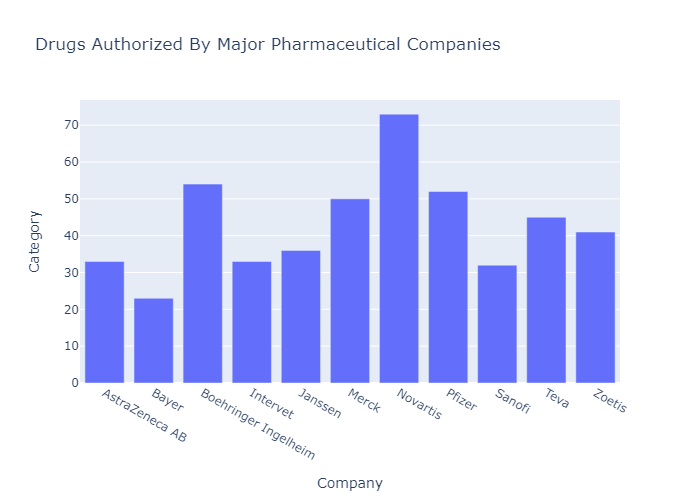

In [15]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [16]:
#rewrite the above code using plotly graph object library 
""" 
import pandas as pd
import plotly.graph_objs as go

# Load CSV file into a pandas DataFrame
df = pd.read_csv('file.csv')

# Create bar chart using plotly graph object
fig = go.Figure(
    data=[go.Bar(x=df['column_name'], y=df['column_name'])],
    layout=go.Layout(title='Bar Chart')
)

# Show the chart
fig.show()

"""

" \nimport pandas as pd\nimport plotly.graph_objs as go\n\n# Load CSV file into a pandas DataFrame\ndf = pd.read_csv('file.csv')\n\n# Create bar chart using plotly graph object\nfig = go.Figure(\n    data=[go.Bar(x=df['column_name'], y=df['column_name'])],\n    layout=go.Layout(title='Bar Chart')\n)\n\n# Show the chart\nfig.show()\n\n"

In [17]:
# Create bar chart using plotly graph object
fig = go.Figure(
    data=[go.Bar(x=df_medicine_authorized['Company'], y=df_medicine_authorized['Category'])],
    layout=go.Layout(title='Drugs Authorized By Major Pharmaceutical Companies')
)

# Show the chart
fig.show()

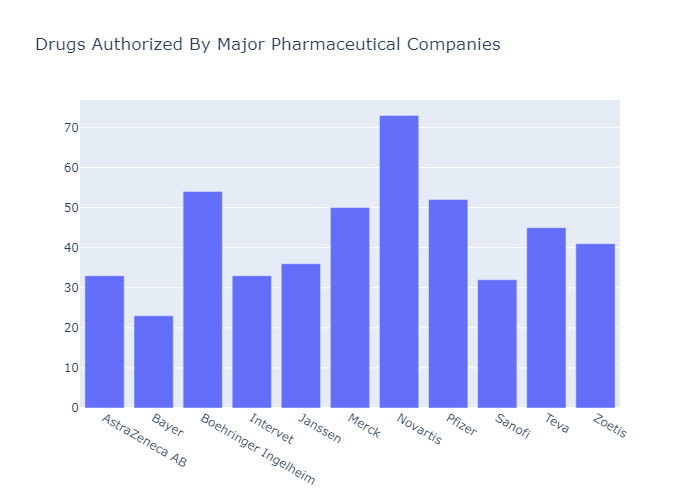

In [18]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [19]:
# Rewrite the above code using plotly graph object library, where the bar looks like a syringe, with a black background and the columns are in descending order
"""  
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('data.csv')

# Sort the DataFrame by the 'Amount' column in descending order
df = df.sort_values(by='Amount', ascending=False)

# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

# Add the syringe shape to the figure
fig.add_shape(type='path',
              path='M 50 0 L 75 0 L 75 100 L 50 100 L 50 0 Z M 50 50 L 0 50 L 0 75 L 50 75 L 50 50 Z',
              fillcolor='red', line_color='red', opacity=0.8)

# Add the bar trace to the figure
fig.add_trace(go.Bar(x=df['Category'], y=df['Amount'],
                     marker=dict(color='red'),
                     hovertemplate='<b>Category:</b> %{x}<br><b>Amount:</b> %{y:.2f}<extra></extra>'))

# Update the layout of the chart
fig.update_layout(title='Expenses by Category',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category'),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()
In this modified code, we first sort the DataFrame by the 'Amount' column in descending order using the sort_values method.

Then, we create a syringe shape using the add_shape method and add it to the figure. We set the fillcolor and line_color to 'red' to match the syringe's color and set the opacity to 0.8 to make the bar chart visible underneath.

Next, we add the bar trace to the figure using the add_trace method. We set the marker color to 'red' to match the syringe's color and customize the hovertemplate to display the category and amount values when hovering over a bar.

Finally, we update the layout of the chart by setting the plot_bgcolor and paper_bgcolor to 'black', adding axis titles, and setting the font color to 'white' for visibility.
"""



"  \nimport pandas as pd\nimport plotly.graph_objects as go\n\n# Load the CSV file into a Pandas DataFrame\ndf = pd.read_csv('data.csv')\n\n# Sort the DataFrame by the 'Amount' column in descending order\ndf = df.sort_values(by='Amount', ascending=False)\n\n# Create a syringe-shaped bar chart using Plotly\nfig = go.Figure()\n\n# Add the syringe shape to the figure\nfig.add_shape(type='path',\n              path='M 50 0 L 75 0 L 75 100 L 50 100 L 50 0 Z M 50 50 L 0 50 L 0 75 L 50 75 L 50 50 Z',\n              fillcolor='red', line_color='red', opacity=0.8)\n\n# Add the bar trace to the figure\nfig.add_trace(go.Bar(x=df['Category'], y=df['Amount'],\n                     marker=dict(color='red'),\n                     hovertemplate='<b>Category:</b> %{x}<br><b>Amount:</b> %{y:.2f}<extra></extra>'))\n\n# Update the layout of the chart\nfig.update_layout(title='Expenses by Category',\n                  plot_bgcolor='black',\n                  paper_bgcolor='black',\n                  xaxis=

In [20]:
# Sort the DataFrame by the 'Amount' column in descending order
df_medicine_authorized = df_medicine_authorized.sort_values(by='Category', ascending=False).reset_index(drop=True)

# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

# Add the syringe shape to the figure
fig.add_shape(type='path',
              path='M 50 0 L 75 0 L 75 100 L 50 100 L 50 0 Z M 50 50 L 0 50 L 0 75 L 50 75 L 50 50 Z',
              fillcolor='red', line_color='red', opacity=0.8)

# Add the bar trace to the figure
fig.add_trace(go.Bar(x=df_medicine_authorized['Company'], y=df_medicine_authorized['Category'],
                     marker=dict(color='red'),
                     hovertemplate='<b>Company:</b> %{x}<br><b>Category:</b> %{y:.2f}<extra></extra>'))

# Update the layout of the chart
fig.update_layout(title='Drugs Authorized By Major Pharmaceutical Companies',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category'),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()

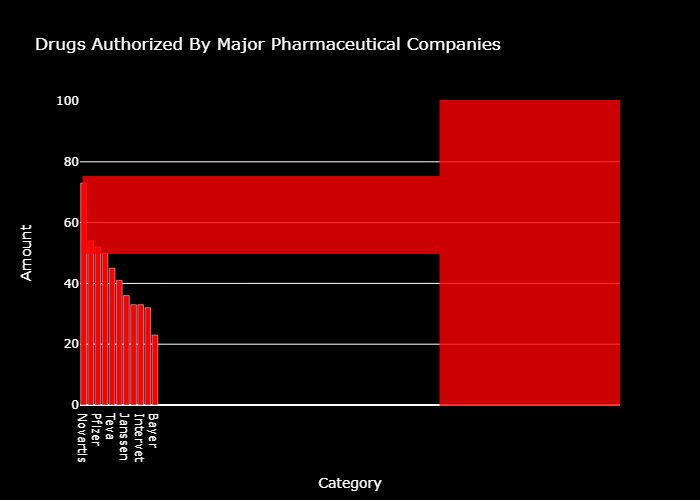

In [21]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [22]:
#Rewrite the above code but make the columns shaped as a syringe
""" 
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('data.csv')

# Sort the DataFrame by the 'Amount' column in descending order
df = df.sort_values(by='Amount', ascending=False)

# Define the syringe shape as a path
syringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'

# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

for i, row in df.iterrows():
    # Add a syringe-shaped bar for each row in the DataFrame
    fig.add_shape(type='path',
                  path=syringe_path,
                  x0=i-0.5, y0=0,
                  x1=i+0.5, y1=row['Amount'],
                  fillcolor='red', line_color='red', opacity=0.8)

# Update the layout of the chart
fig.update_layout(title='Expenses by Category',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category', tickvals=list(range(len(df))), ticktext=df['Category']),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()

"""


" \nimport pandas as pd\nimport plotly.graph_objects as go\n\n# Load the CSV file into a Pandas DataFrame\ndf = pd.read_csv('data.csv')\n\n# Sort the DataFrame by the 'Amount' column in descending order\ndf = df.sort_values(by='Amount', ascending=False)\n\n# Define the syringe shape as a path\nsyringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'\n\n# Create a syringe-shaped bar chart using Plotly\nfig = go.Figure()\n\nfor i, row in df.iterrows():\n    # Add a syringe-shaped bar for each row in the DataFrame\n    fig.add_shape(type='path',\n                  path=syringe_path,\n                  x0=i-0.5, y0=0,\n                  x1=i+0.5, y1=row['Amount'],\n                  fillcolor='red', line_color='red', opacity=0.8)\n\n# Update the layout of the chart\nfig.update_layout(title='Expenses by Category',\n                  plot_bgcolor='black',\n                  paper_bgcolor='black',\n                  xax

In [24]:

# Define the syringe shape as a path
syringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'

# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

for i, row in df_medicine_authorized.iterrows():
    # Add a syringe-shaped bar for each row in the DataFrame
    fig.add_shape(type='path',
                  path=syringe_path,
                  x0=i-0.5, y0=0,
                  x1=i+0.5, y1=row['Category'],
                  fillcolor='red', line_color='red', opacity=0.8)

# Update the layout of the chart
fig.update_layout(title='Drugs Authorized By Major Pharmaceutical Companies',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category', tickvals=list(range(len(df_medicine_authorized))), ticktext=df_medicine_authorized['Company']),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()

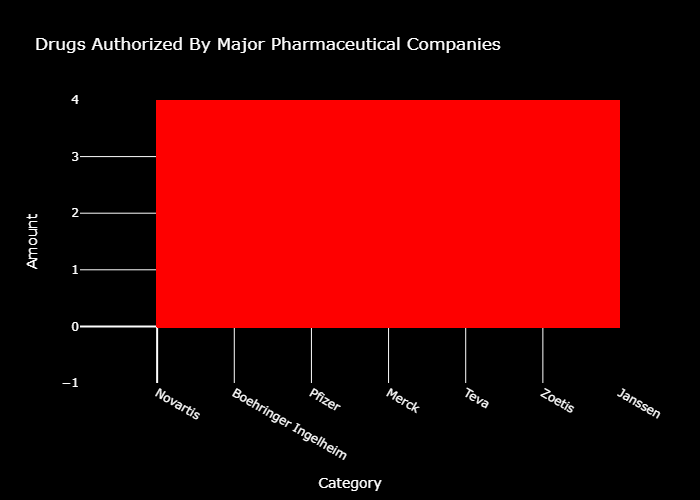

In [25]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [26]:
# add a verticla line to each bar column using python plotly graph object 

"""  
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('data.csv')

# Sort the DataFrame by the 'Amount' column in descending order
df = df.sort_values(by='Amount', ascending=False)

# Define the syringe shape as a path
syringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'

# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

for i, row in df.iterrows():
    # Add a syringe-shaped bar for each row in the DataFrame
    fig.add_shape(type='path',
                  path=syringe_path,
                  x0=i-0.5, y0=0,
                  x1=i+0.5, y1=row['Amount'],
                  fillcolor='red', line_color='red', opacity=0.8)
    
    # Add a vertical line to the top of each syringe-shaped bar
    fig.add_shape(type='line',
                  x0=i, y0=row['Amount'], x1=i, y1=row['Amount'] + 20,
                  line=dict(color='white', width=2))

# Update the layout of the chart
fig.update_layout(title='Expenses by Category',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category', tickvals=list(range(len(df))), ticktext=df['Category']),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()

"""


"  \nimport pandas as pd\nimport plotly.graph_objects as go\n\n# Load the CSV file into a Pandas DataFrame\ndf = pd.read_csv('data.csv')\n\n# Sort the DataFrame by the 'Amount' column in descending order\ndf = df.sort_values(by='Amount', ascending=False)\n\n# Define the syringe shape as a path\nsyringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'\n\n# Create a syringe-shaped bar chart using Plotly\nfig = go.Figure()\n\nfor i, row in df.iterrows():\n    # Add a syringe-shaped bar for each row in the DataFrame\n    fig.add_shape(type='path',\n                  path=syringe_path,\n                  x0=i-0.5, y0=0,\n                  x1=i+0.5, y1=row['Amount'],\n                  fillcolor='red', line_color='red', opacity=0.8)\n    \n    # Add a vertical line to the top of each syringe-shaped bar\n    fig.add_shape(type='line',\n                  x0=i, y0=row['Amount'], x1=i, y1=row['Amount'] + 20,\n             

In [27]:
# Create a syringe-shaped bar chart using Plotly
fig = go.Figure()

syringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'

for i, row in df_medicine_authorized.iterrows():
    # Add a syringe-shaped bar for each row in the DataFrame
    fig.add_shape(type='path',
                  path=syringe_path,
                  x0=i-0.5, y0=0,
                  x1=i+0.5, y1=row['Category'],
                  fillcolor='red', line_color='red', opacity=0.8)
    
    # Add a vertical line to the top of each syringe-shaped bar
    fig.add_shape(type='line',
                  x0=i, y0=row['Category'], x1=i, y1=row['Category'] + 20,
                  line=dict(color='white', width=2))

# Update the layout of the chart
fig.update_layout(title='Expenses by Category',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category', tickvals=list(range(len(df_medicine_authorized))), ticktext=df_medicine_authorized['Company']),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()


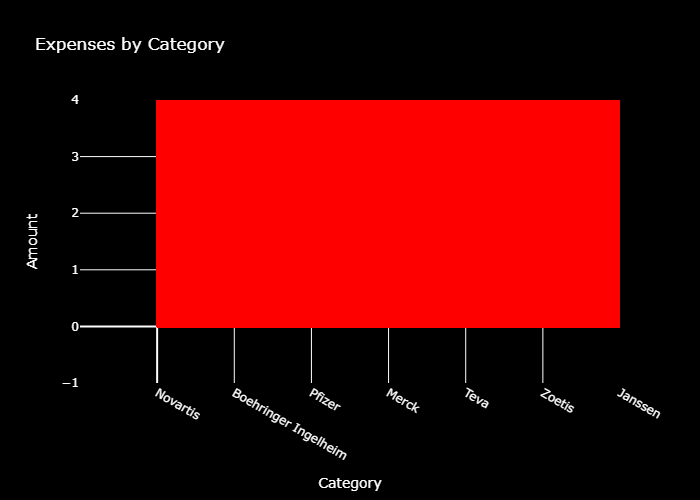

In [28]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

### Combining Prompt with underlying code

In [29]:


fig = go.Figure()

fig.add_trace(go.Bar(x=df_medicine_authorized['Company'], y=df_medicine_authorized['Category']))

for i, row in df_medicine_authorized.iterrows():

    # Add a vertical line to the top of each syringe-shaped bar
    fig.add_shape(type='line',
                  x0=i, y0=row['Category'], x1=i, y1=row['Category'] + 20,
                  line=dict(color='white', width=2))

# Update the layout of the chart
fig.update_layout(title='Drugs Authorized By Major Pharmaceutical Companies',
                  plot_bgcolor='black',
                  paper_bgcolor='black',
                  xaxis=dict(title='Category', tickvals=list(range(len(df_medicine_authorized))), ticktext=df_medicine_authorized['Company']),
                  yaxis=dict(title='Amount'),
                  font=dict(color='white'))

fig.show()

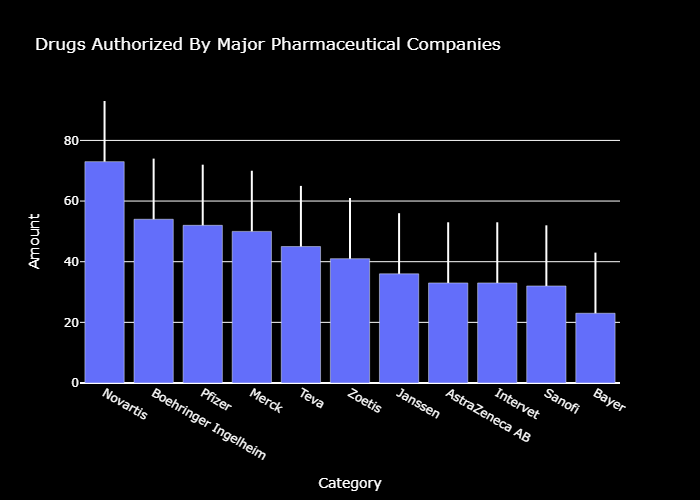

In [30]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [31]:
# NOTE: What is considered as a syringe by ChatGPT-3
syringe_path = 'M 0 0 L 40 0 L 40 20 L 0 20 L 0 0 M 20 20 L 20 50 L 0 50 L 0 60 L 20 60 L 20 80 L 40 80 L 40 60 L 20 60 L 20 20 Z'
fig = go.Figure()
fig.add_shape(type='path',
                  path=syringe_path,
                  x0=i-0.5, y0=0,
                  x1=i+0.5, y1=1,
                  fillcolor='red', line_color='red', opacity=0.8)
fig.show()

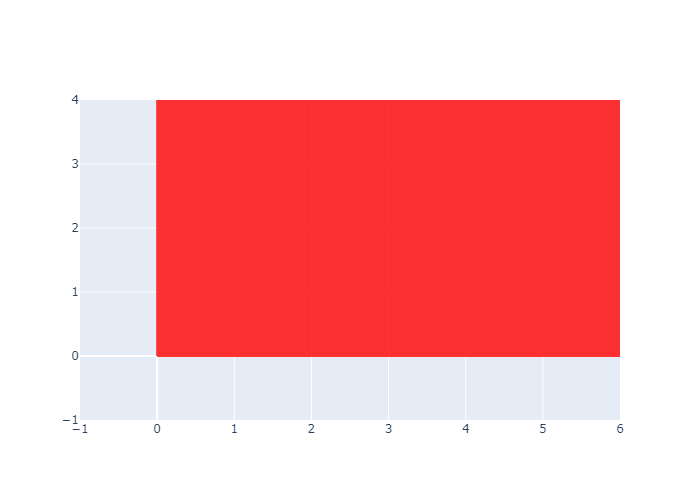

In [32]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)